# Assignment 1

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2025/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday March 3rd, 2025 at 23:55. Hand in your files via DTU Learn. 

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import math
import seaborn as sns
from scipy.stats import probplot

import warnings
warnings.filterwarnings('ignore')

## Part 1

From week 1's exercise, I'd like you to complete the "*Exercise 3*: Temporal patterns". The one where the main plot is the year-by-year evolution of the 10 focus crimes.

**IMPORTANT**: FOR THIS AND ALL SUBSEQUENT EXERCISES, I WANT YOU TO USE THE FULL DATASET FROM 2003 TO 2025.

In [2]:
# read the dataset
data = pd.read_csv('./data/police_incidents.csv')

# define the 10 focus crimes
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

# filter the data to only include the focus crimes
data_focus = data[data['Incident Category'].isin(focuscrimes)]


Important preprocessing steps made to the file containing the full dataset: 
- Not relevat columns were deleted and columns with different names in the two given datasets where renamed to the same name. 
- Date-type columns where processed to have the same format in both datasets
- Data in columns 'Incident Category', 'Incident Description' and 'Police District' was converted to upper case for all instances. 
- Rows with missing values were dropped. 
- Categories that were named with synonyms were grouped under the title of the pertinent focus crime. 


Year with most crimes:  2018

Year with least crimes:  2025 



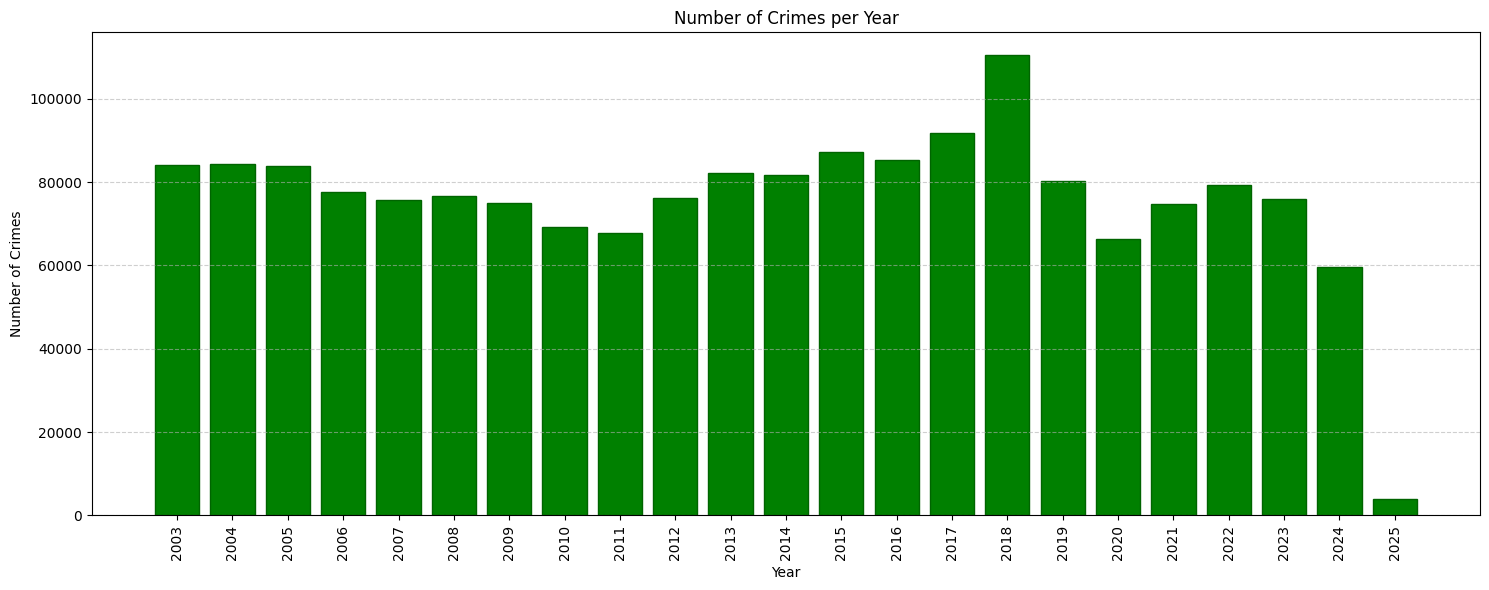

In [3]:
# Number of crimes per year

# count number of crimes per year
crimes_per_year = data_focus['Incident Year'].value_counts().sort_index()

# year with most crimes
year_with_most_crimes = crimes_per_year.idxmax()
print('\nYear with most crimes: ', year_with_most_crimes)

# year with least crimes
year_with_least_crimes = crimes_per_year.idxmin()
print('\nYear with least crimes: ', year_with_least_crimes, '\n')

# bar plot of the number of crimes per year
plt.figure(figsize=(15, 6))
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.bar(crimes_per_year.index, crimes_per_year.values, color = 'green', edgecolor='darkgreen')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per Year')
plt.xticks(crimes_per_year.index, rotation=90)  # Rotate the x-axis labels vertically
plt.tight_layout()
plt.show()


**What is the year with most focus crimes?**

The year with most focus crimes is 2018, with more than 100.000 crimes. 

**What is the year with the fewest focus crimes?**

The year with the fewest focus crimes, without taking into account 2025, as it does not contain information of the whole year, is 2024, with a little bit less than 60.000 crimes, suprisingly below 2020. 

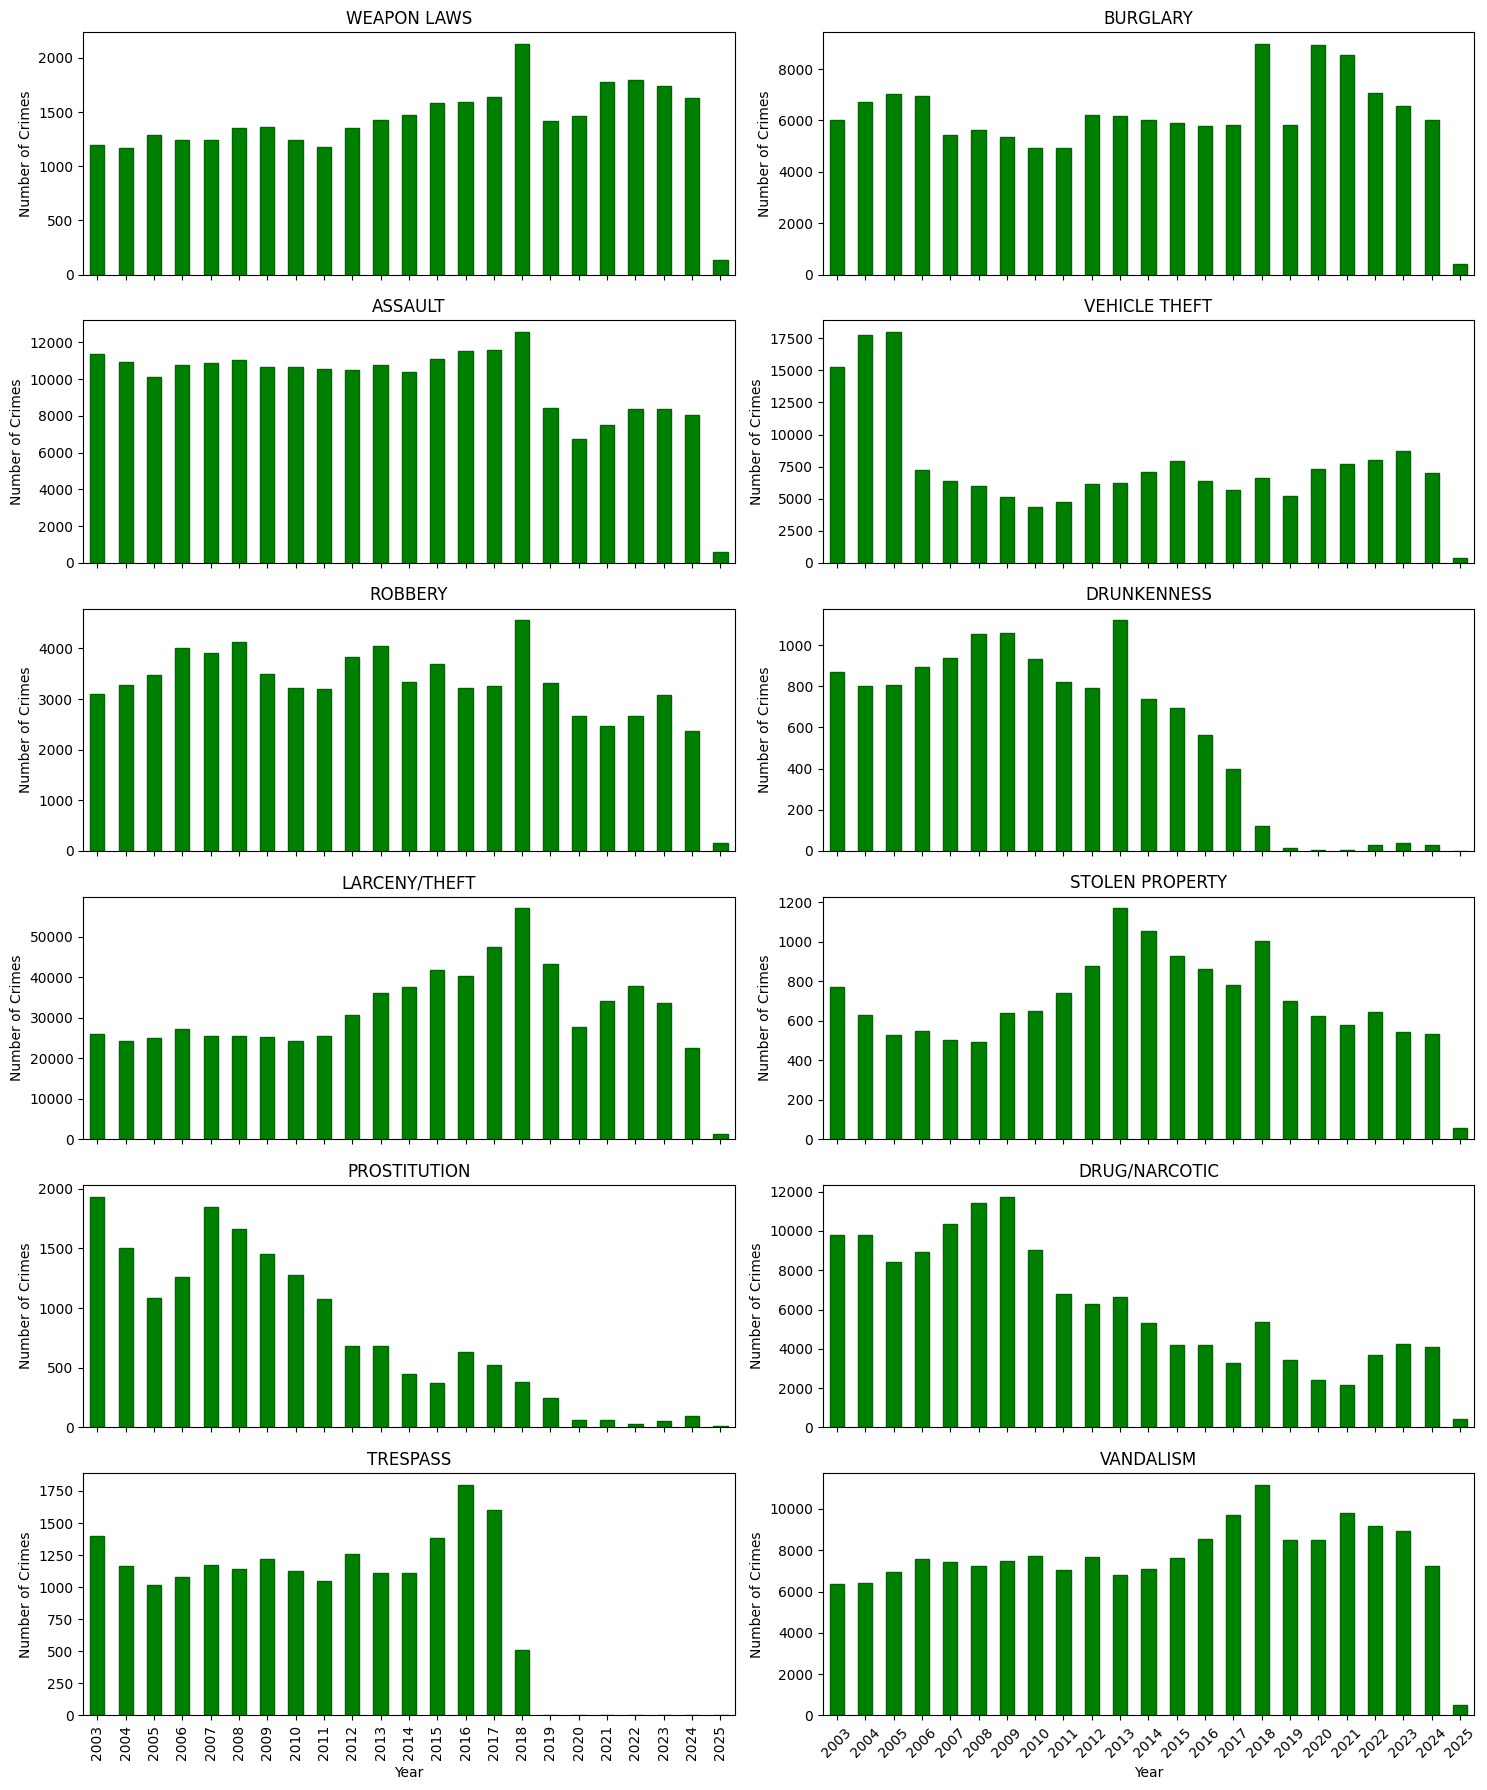

In [4]:
# Create bar-charts displaying the year-by-year development of each of these categories.

# Group data by category and year
category_year_counts = data_focus.groupby('Incident Category')['Incident Year'].value_counts().unstack()

# Define the number of rows and columns of the subplots
num_cols = 2
num_categories = len(focuscrimes)
num_rows = math.ceil(num_categories / num_cols)

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows), sharex=True)
axes = axes.flatten()

for i, category in enumerate(focuscrimes):
    category_year_counts.loc[category].plot(kind='bar', ax=axes[i], color = 'green', edgecolor='darkgreen')
    axes[i].set_title(f'{category}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Number of Crimes')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Comment on at least three interesting trends in your plot:**

Several observations can be made from the plots. 
- First, there is a noticeable decrease in crimes related to drugs and narcotics, as well as prostitution, over the years. Drug-related crimes peaked in 2009 and have been declining since then. Prostitution-related crimes peaked in 2007 and have also been decreasing. While prostitution crimes appear to be nearly disappearing, drug-related crimes, although reduced, still occur relatively frequently.
- Second, vehicle theft crimes experienced a significant increase between 2003 and 2005. After this period, the number of vehicle thefts decreased but has remained relatively stable since 2006, indicating that vehicle theft is still a persistent issue.
- Crimes such as assault, weapon law violations, and robbery have remained relatively constant over the years. This consistency suggests that these types of crimes are ongoing issues that require continuous monitoring and intervention.
- Finally, crimes related to drunkenness and trespassing appear to be underreported or not monitored from 2019 onwards, as there is very little or no data collected for these crimes in the most recent period. This lack of data could indicate changes in reporting practices or enforcement priorities.

## Part 2

Next, I would like you to answer some of the questions related to the videos shown during week 2. Specifically, I would like you to

* Answer questions related to the main video-lecture on Data Visualization. (Where the first question is "What is the difference between *data* and *metadata*?")

    * What is the difference between *data* and *metadata*? How does that relate to the GPS tracks-example?
    
    If we specify the definitions for the GPS example, data would be the actual recorded activities, like the distance or heart rate, while the metadata would be the information about this data, such as the data collection method or the GPS accuracy.  

    * Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult. 

    Yes, we agree that the human eye is a great tool for data analysis, however, it is not good in all the tasks. We would say that the eye is good at recognizing patterns and detecting outliers, these are two well-known facts, as we, for example, are very good at recognizing familiar faces, even though they change a little bit (they get a haircut or wear glasses). However, we also know that it has some limitations. For example, it can have trouble tracking fast-moving objects, because we have a limited number of frames per second that we can process. 


    * Simpson's paradox is hard to explain. Come up with your own example - or find one on line.
    
    Another example that could explain Simpson’s paradox could be the comparison of the effectiveness of two new drugs. Imagine you have two drugs in a clinical trial phase, and you test these two drugs in different groups of different sizes. In each individual group, drug 1, for example, could be better than drug 2. However, what is important to know is the overall success rate of the drug. In this case, if drug 2 has a larger number of participants in the groups where its success rate is higher, and drug 1 has smaller groups where its effectiveness is higher, the final result would show that drug 2 is more effective overall, even though it is outperformed by drug 1 in every individual group.

    * In your own words, explain the difference between *exploratory* and *explanatory* data analysis.

    Exploratory data analysis is when you investigate a dataset to understand its main characteristics, detect patterns or identify relationships. Its goal is to explore the data and discover insights. On the other hand, explanatory data analysis is when we already have insights of the data and we want to communicate them.



* Answer questions related to the video on "Nice plots". That is, generate the list of 10 rules for nice plots.
    1. When displaying multiple plots, use subplots. 
    2. Optimize spacing with plt.tight_layout()
    3. Always add labels!
    4. Choose meaningful axis values, they don't necessarly need to be the default ones. 
    5. Ensure legends and annotations don't overlap with the data. 
    6. Adjust the values of the y-axis to a correct scale, taking into account the data context.
    7. In subplots, axes should be comparable, so y-axis scales and limits should be consistent across plots. 
    8. Keep plots simple, include only the essential components and data.
    9. Change the default font and maintain a consistent font style across all plots you do for a particular project. 
    10. Add meaningful captions: include a headline for context and a brief explanation for each figure.

## Part 3

We stay with week 2. I would also like you to complete the exercise in Week 2, Part 4, entitled "*Exercise*: Other cool ways to plot temporal data" (the one where we explore alternatives to bar-plots, such as calendar plots, for plotting temporal data).

In the exercise, i ask you to explore 3 different types of plots. For this assignment, you only need to do a calendar and polar bar chart.


> * Calendar plots. Get started on calendar plots **[here](https://calplot.readthedocs.io/en/latest/)**. There are other packages for plotting these, those are also OK to use.
> * [Polar bar chart](https://user-images.githubusercontent.com/12328192/89272649-be76e200-d63e-11ea-97ad-fd1ba5831c89.png). Here I want you to plot a 24-hour pattern of some sort -- those work really well in radial plots (another name for polar plots) because the day  wraps around on itself. You can also try plotting data with patterns from the 168 hours of the week. There's not one super-awesome solution here, you can try using [pure matplotlib](https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_bar.html) ... [some examples here](https://www.python-graph-gallery.com/circular-barplot/) or via [plotly](https://plotly.com/python/polar-chart/) (scroll down a bit for the polar barchart).

We will present a **calendar plot** for  **Robbery**. The goal is to analyze how it varies over the years and observe its fluctuations. For **Robbery**, we aim to identify any potential **seasonality patterns**, particularly around **Christmas** or during the **summer months**, when tourism is higher.

In [5]:
import calplot

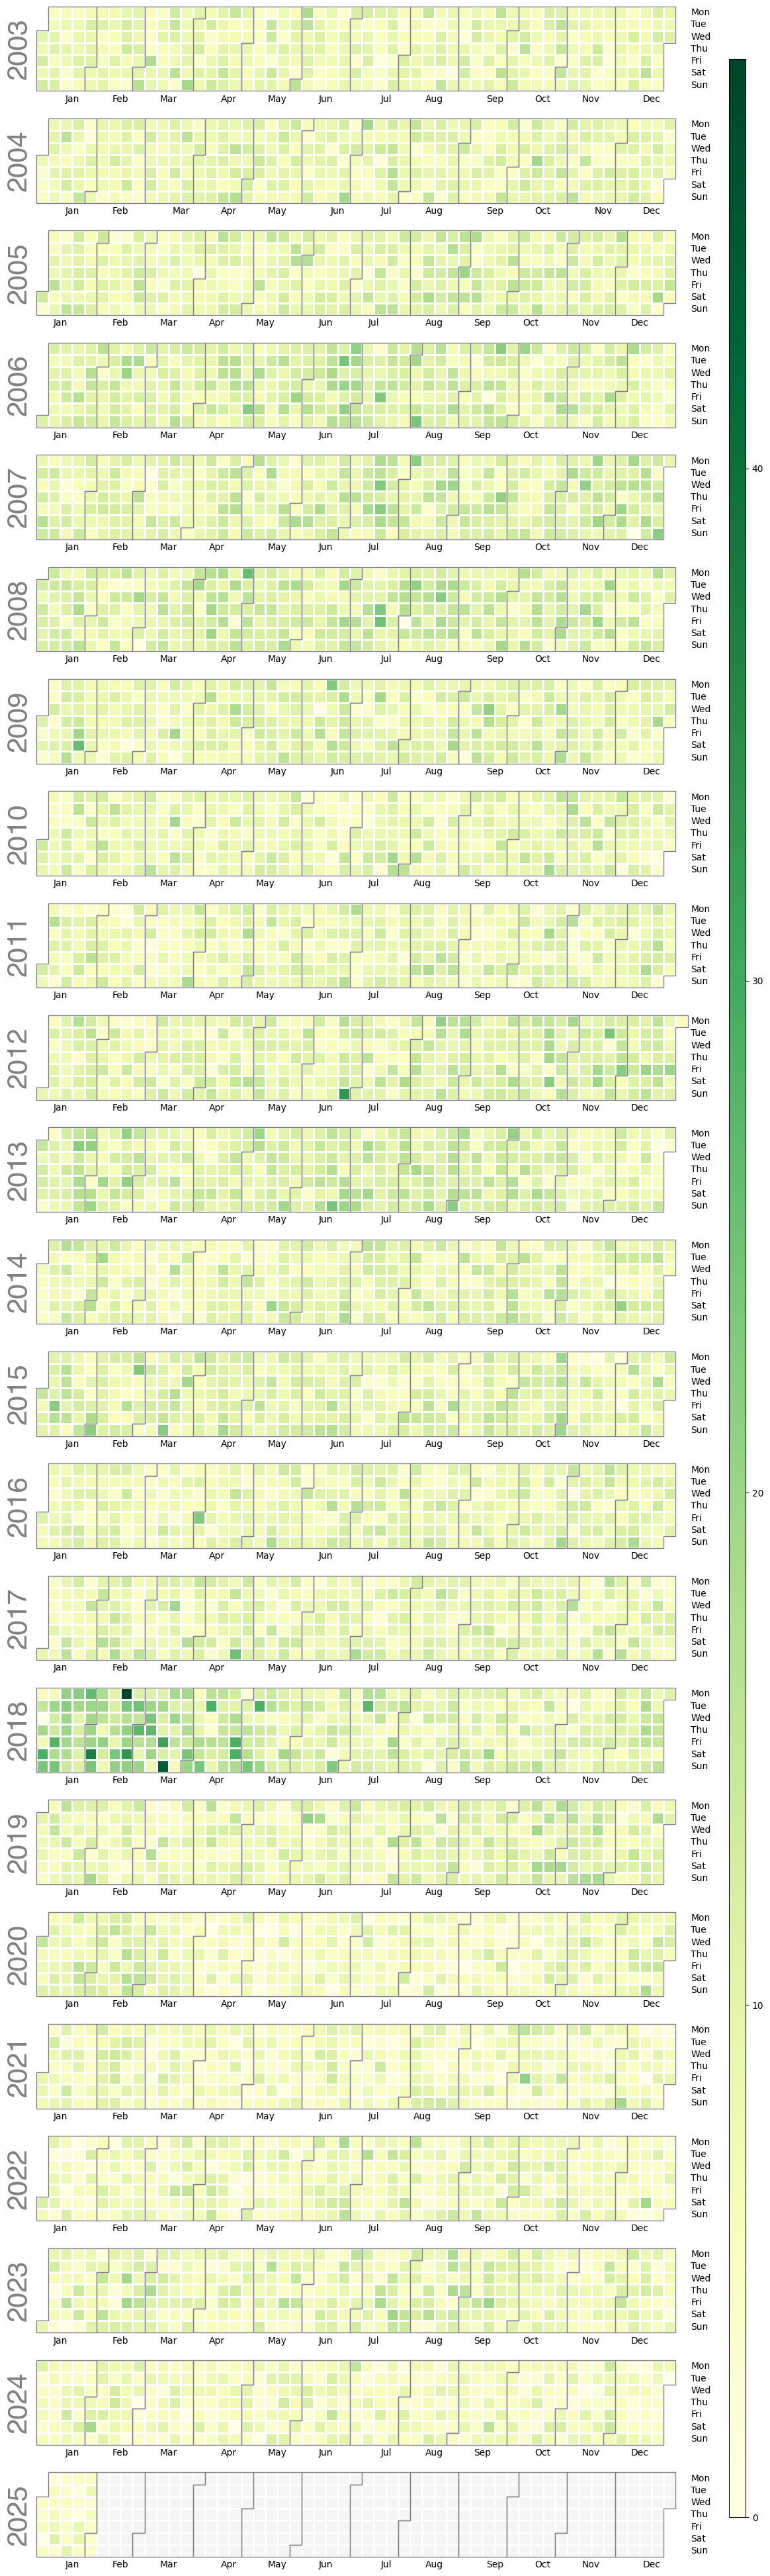

In [6]:
theft_data = data_focus[data_focus["Incident Category"] == "ROBBERY"].copy()
theft_data['Incident Date'] = pd.to_datetime(theft_data['Incident Date'])

daily_counts = theft_data.groupby('Incident Date').size()  #incidents per day

fig, ax = calplot.calplot(daily_counts, cmap='YlGn', colorbar=True)   
plt.show()

As observed in **Robbery**, there is a slight increase in thefts during the **summer**, possibly due to **tourism**. While the variation is not highly significant, there is still a noticeable trend. 

An exception is **2018**, where a **significant increase** in robberies can be seen **during the first quarter of the year**.

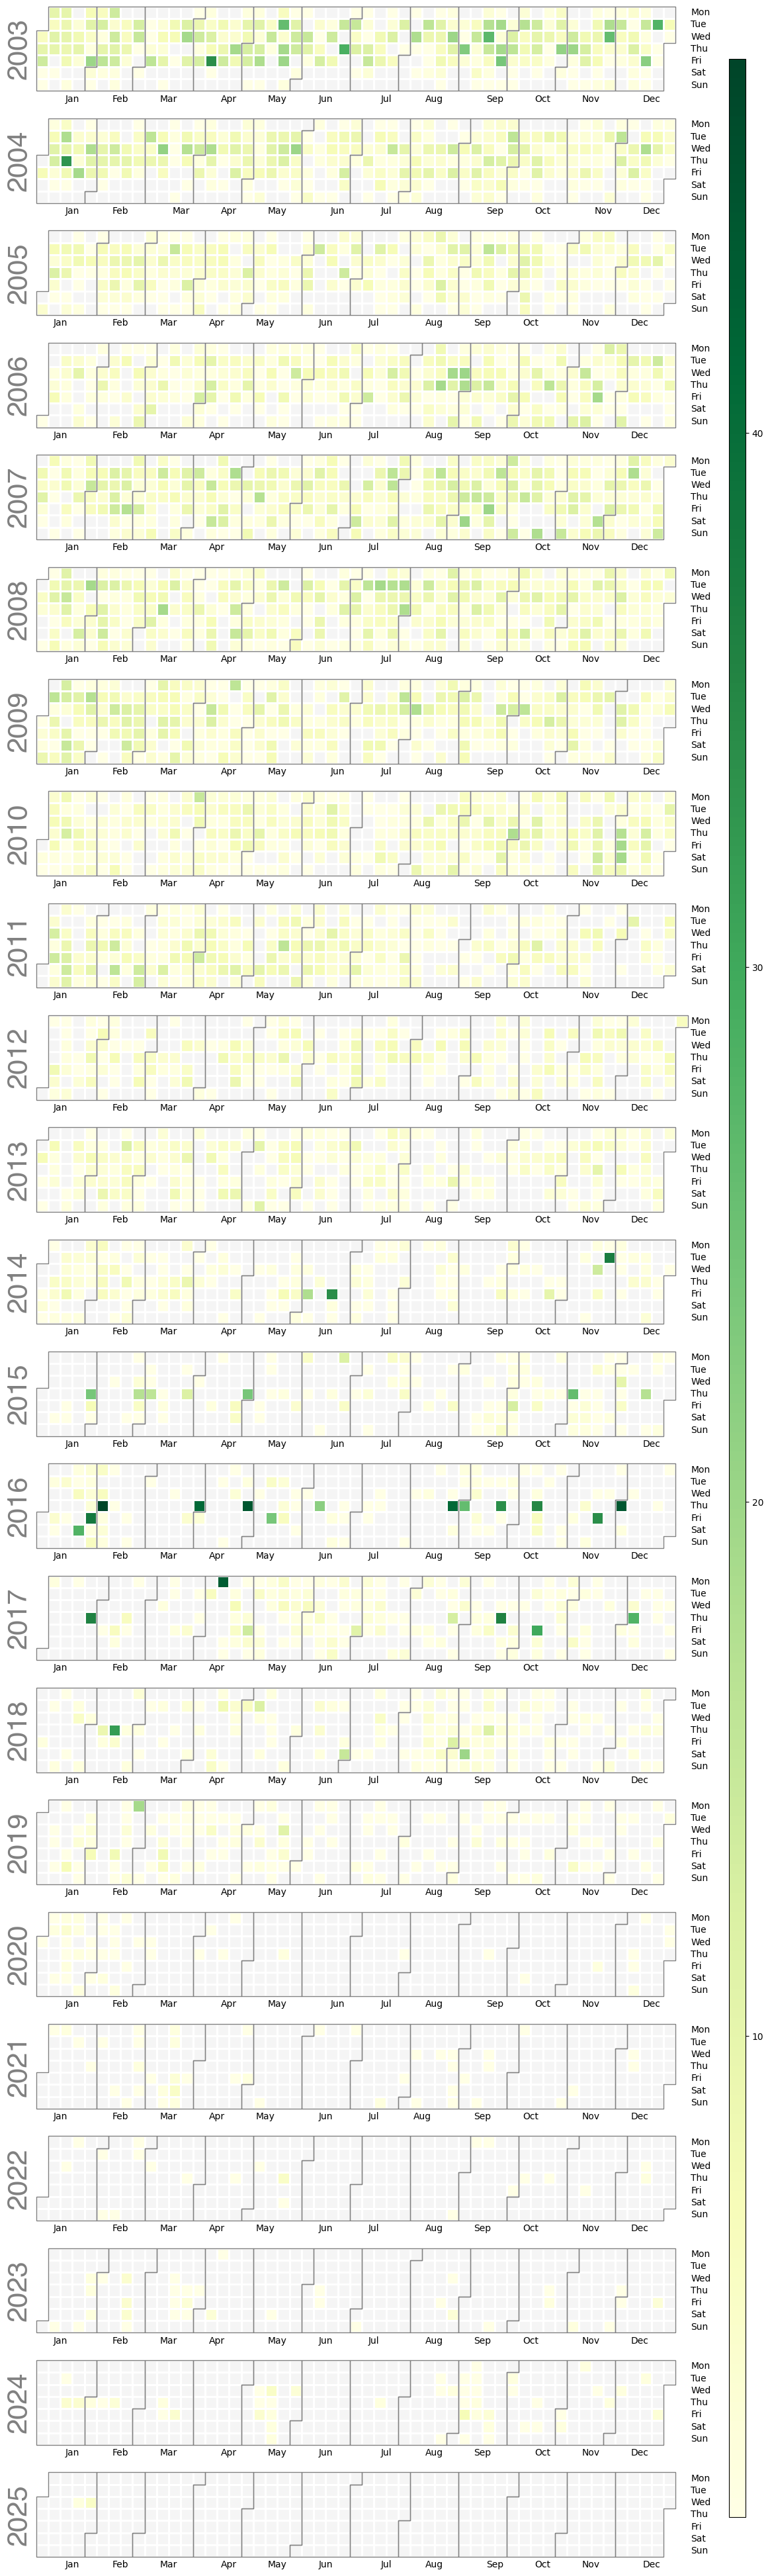

In [7]:
prostitution_data = data_focus[data_focus["Incident Category"] == "PROSTITUTION"]
prostitution_data['Incident Date'] = pd.to_datetime(prostitution_data['Incident Date'])

daily_counts = prostitution_data.groupby('Incident Date').size()

fig, ax = calplot.calplot(daily_counts, cmap='YlGn', colorbar=True)
plt.show()

The script generates two polar bar charts—one for each crime category—to visualize the hourly distribution of incidents

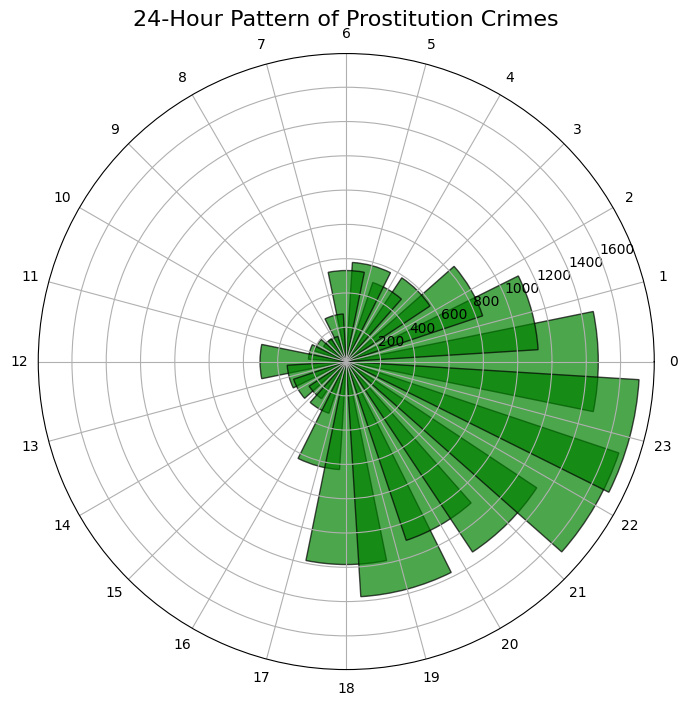

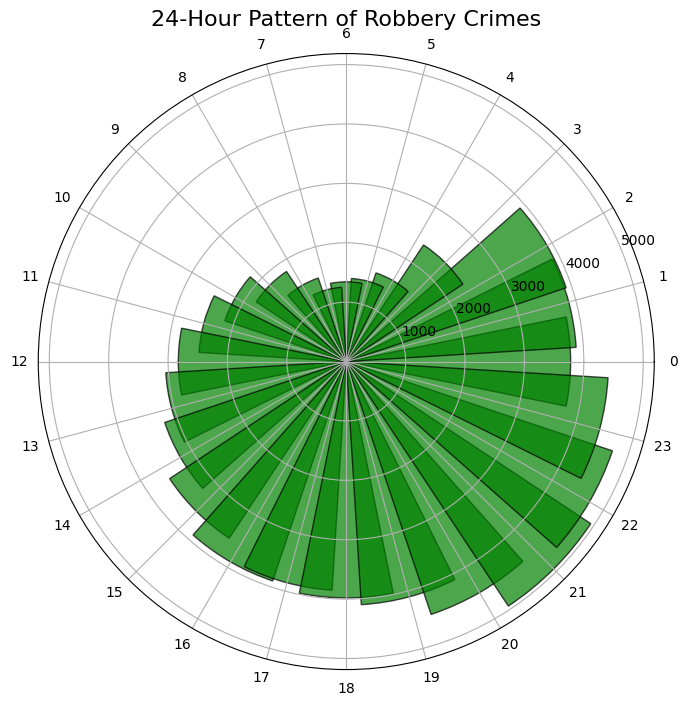

In [8]:
focus_crimes = ["PROSTITUTION", "ROBBERY"]
hours = np.arange(24)  # 24-hour 
theta = 2 * np.pi * hours / 24  #hours to radians 

for crime in focus_crimes:
    # Filter data
    crime_data = data_focus[data_focus["Incident Category"] == crime]

    # Count occurrences per hour
    hourly_counts = crime_data["Incident Hour"].value_counts().reindex(hours, fill_value=0)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
    ax.bar(theta, hourly_counts, width=0.4, bottom=0, color='green', edgecolor='black', alpha=0.7)

    # Labels and title
    ax.set_xticks(theta)
    ax.set_xticklabels(hours)
    ax.set_title(f"24-Hour Pattern of {crime.capitalize()} Crimes", fontsize=16, pad=20)

    plt.show()


For prostitution, there is an increase in the evening, right after working hours until the early morning, peaking around midnight (00:00-01:00). The highest peaks occur at 22:30 and 23:30.

For robbery, the lowest number of incidents occurs early in the morning, between 4:00 AM and 8:00 AM, with significantly fewer cases compared to the evening it could be due to most people are at home or sleeping and here are fewer potential victims on the streets. From 19:00 (7 PM) onward, robberies begin to rise, reaching their peak at around 21:00 (9 PM), more people are out after work, shopping, or socializing, making them potential targets.

## Part 4

From week 3, I'd like you to work on the exercise contained in Week 3, Part 3. Specifically, I would like you to **both** complete "*Excercise Part 1*: Connecting the dots and recreating plots from DAOST but using our own favorite dataset" and "*Excercise Part 2*". These exercises focus on reproducing figure 2.1, 2.4 and 2.11 and exploring a few more ideas from the book using data from SFPD.


### Exercise Part 1

> * Let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on *SF Police data*. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

For this exercise, we will create a jitter-plot for the prostitution data in 2003. As we have seen in previous exercices, this is the year when most crimes of this category occured. More precisely, we will focus in the crimes that ocurred around 23 during the last 6 months of the year.

First, we will proceed with the filtering of the data.

In [9]:
#keep only those whose category is prostitution and year is 2003
prostitution_data = data_focus[data_focus['Incident Category'] == 'PROSTITUTION']
prostitution_data = prostitution_data[prostitution_data['Incident Year'] == 2003]
prostitution_data.head()

#keep only data for the last 6 months
prostitution_data = prostitution_data[prostitution_data['Incident Month'] >= 7]

#keep only data for the hours between 23 and 24
prostitution_data = prostitution_data[(prostitution_data['Incident Hour'] == 23)]


# Add vertical jitter (random noise on y-axis)
np.random.seed(42)  # For reproducibility
prostitution_data['Jitter'] = np.random.uniform(-0.1, 0.1, size=len(prostitution_data))

prostitution_data.head()

,Incident Number,Incident Code,Incident Category,Incident Description,Incident Day of Week,Incident Date,Incident Time,Police District,Resolution,Address,...,Point,Neighborhoods,Current Police Districts,Current Supervisor Districts,Incident Month,Incident Month Name,Incident Year,Incident Hour,Incident Minute,Jitter
14787,30815437,13070,PROSTITUTION,SOLICITS TO VISIT HOUSE OF PROSTITUTION,Tuesday,2003-07-08,23:09,MISSION,"ARREST, BOOKED",SOUTH VAN NESS AV / 17TH ST,...,POINT (-122.41733258259801 37.7635718955939),53.0,3.0,2.0,7,July,2003,23,9,-0.025092
28492,31139290,13070,PROSTITUTION,SOLICITS TO VISIT HOUSE OF PROSTITUTION,Friday,2003-09-26,23:20,MISSION,"ARREST, BOOKED",FOLSOM ST / 18TH ST,...,POINT (-122.41500053679398 37.7620990020727),53.0,3.0,2.0,9,September,2003,23,20,0.090143
42879,31431949,13070,PROSTITUTION,SOLICITS TO VISIT HOUSE OF PROSTITUTION,Monday,2003-12-08,23:15,NORTHERN,"ARREST, BOOKED",STEINER ST / WILMOT ST,...,POINT (-122.435202377987 37.7872742465549),103.0,4.0,11.0,12,December,2003,23,15,0.046399
91648,90253758,13020,PROSTITUTION,PANDERING,Thursday,2003-11-13,23:55,BAYVIEW,NONE,200 Block of CHINABASIN ST,...,POINT (-122.387789980293 37.7757113649966),34.0,1.0,10.0,11,November,2003,23,55,0.019732
165723,31155042,13070,PROSTITUTION,SOLICITS TO VISIT HOUSE OF PROSTITUTION,Sunday,2003-09-28,23:59,NORTHERN,"ARREST, BOOKED",LARKIN ST / POST ST,...,POINT (-122.418274171667 37.7870372043456),50.0,6.0,10.0,9,September,2003,23,59,-0.068796


Once we have only the data that we want to analyze, we can proceed to the creation of the plot.

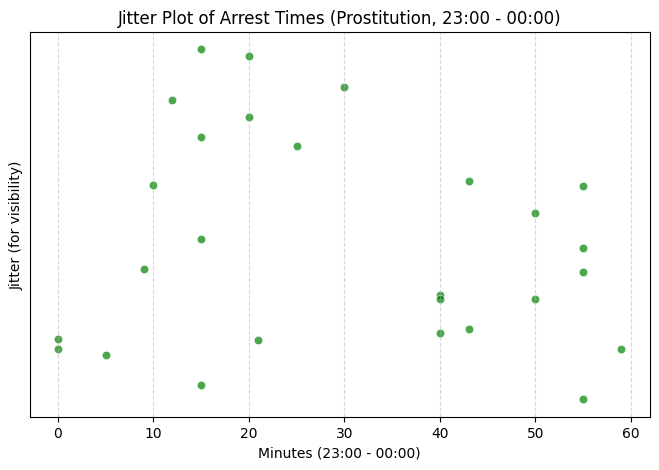

In [10]:
# Plot the jitter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=prostitution_data['Incident Minute'], y=prostitution_data['Jitter'], alpha=0.7, color='green')

# Labels and styling
plt.xlabel("Minutes (23:00 - 00:00)")
plt.ylabel("Jitter (for visibility)")
plt.title("Jitter Plot of Arrest Times (Prostitution, 23:00 - 00:00)")
plt.yticks([])  # Hide y-axis labels since it's just jitter
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

This jitter plot allows us to see the arrest times for prostitution crimes from 23:00 to 00:00, where the x-axis represent the minutes within the hour. As it can be seen, it doesn't seem to be a clear pattern on the distribution of the arrests withing the hour. However, it seem that the arrests tend to happen around round-minute marks, for example, 10, 15 or 20 minutes, which leads us to think that te officers don't really note down the exact time of the arrest.

> * Last time, we did lots of bar-plots. Today, we'll play around with histograms (creating two crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). I think the GPS data could be fun to see this way. 
    >   * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
    >   * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 

For this part of the exercise, we decided to work with assault and drug/narcotic crimes. After trying different time intervals, we decided to use the data for 2024.

In [11]:
two_crime_data = data_focus[(data_focus['Incident Category'] == 'ASSAULT') | (data_focus['Incident Category'] == 'DRUG/NARCOTIC')]
two_crime_data = two_crime_data[two_crime_data['Incident Year'] >= 2024]
len(two_crime_data)

13142

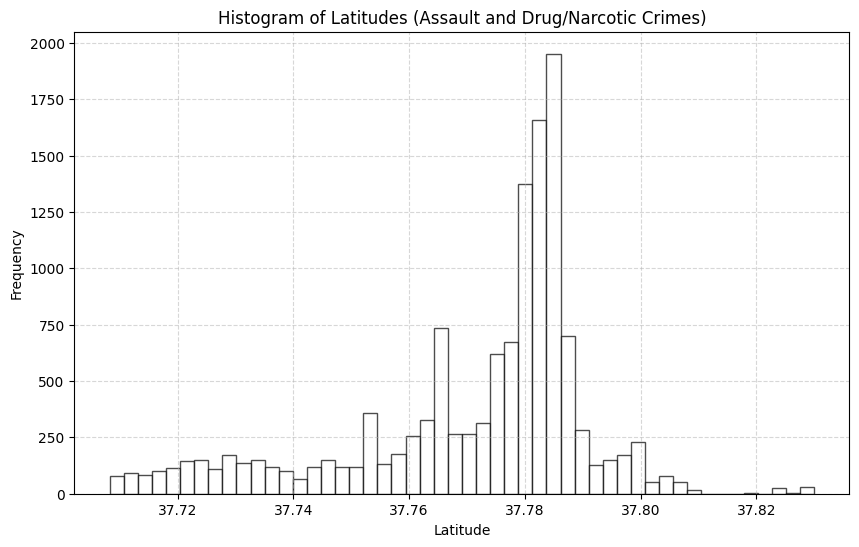

In [12]:
#take the latitude of the data and binn the latitudes using numpy's histogram function
latitudes = two_crime_data['Latitude']
latitudes = latitudes.dropna()

# Binning the latitudes
lat_bins = np.histogram(latitudes, bins=50)[1]  # Get the bin edges

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(latitudes, bins=lat_bins, color='white', edgecolor='black', alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Frequency")
plt.title("Histogram of Latitudes (Assault and Drug/Narcotic Crimes)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

The histogram shows that most assault and drug/narcotic crimes happen around latitude 37.78, making it a clear crime hotspot. There are smaller peaks in other areas, but crime is not spread evenly. This suggests certain locations have much higher crime rates, which could help police and city officials focus their efforts where they are needed most.

> * Next up is using the plot-type shown in **Figure 2-4** from DAOST, but with the data you used to create Figure 2.1. There is not a single great way to create kernel density plots in Python. [Here](https://www.geeksforgeeks.org/density-plots-with-pandas-in-python/), you'll finde a pandas based strategy, but you can also use `gaussian_kde` from `scipy.stats` ([for an example, check out this stackoverflow post](https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib)) or you can use [`seaborn.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html). There is also another nice tutorial for KDE plots [here](https://medium.com/towards-data-science/histograms-and-density-plots-in-python-f6bda88f5ac0). <font color="gray">Or ask your LLM what it recommends</font>.

For this, we will use the prostitution data previously filtered. We will plot the minutes in the x-axis and the density in the y-axis

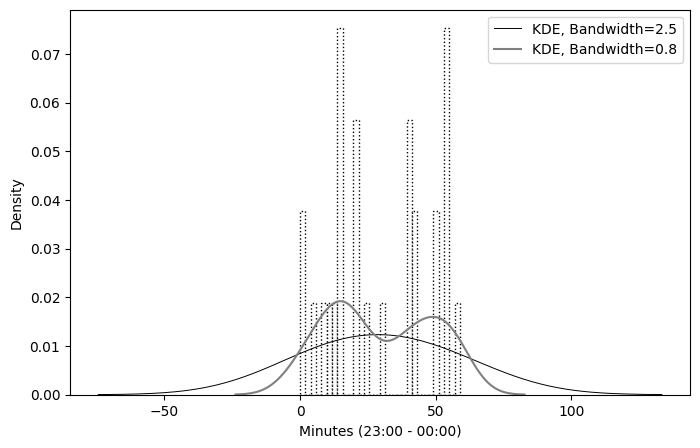

In [13]:
# Extract only the minutes
minutes = prostitution_data['Incident Minute'].values

# Create the figure
fig, ax = plt.subplots(figsize=(8, 5))


# Plot histogram with dotted lines
sns.histplot(minutes, bins=30, kde=False, color='white', stat='density',
             edgecolor='black',linestyle= 'dotted', linewidth=1, ax=ax)

# Plot KDE curves with different bandwidths
sns.kdeplot(minutes, bw_adjust=2.5, color='black', linewidth=0.7, label="KDE, Bandwidth=2.5", ax=ax)
sns.kdeplot(minutes, bw_adjust=0.8, color='gray', linewidth=1.5, label="KDE, Bandwidth=0.8", ax=ax)

# Labels and legend
ax.set_xlabel("Minutes (23:00 - 00:00)")
ax.set_ylabel("Density")
#ax.set_xlim(0, 60)
ax.legend()
plt.show()



> * Now grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can be misleading? 

Now we will select 25 random data points from the dataset that only has assault and drug/narcotic crimes. We will then do a similar plot, but in this case the x-axis will be the latitude.

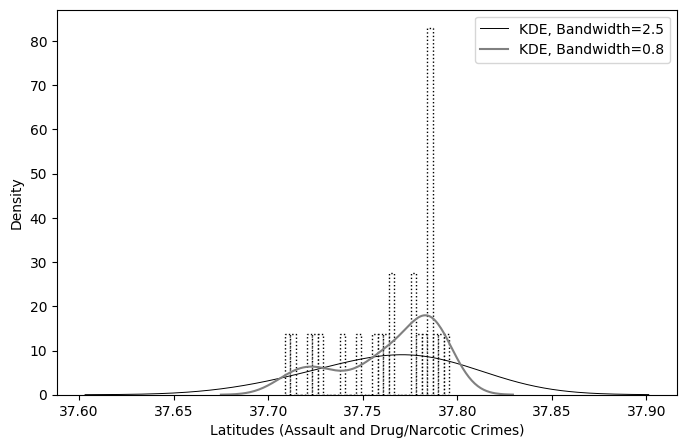

In [14]:
#set a seed
np.random.seed(42)

two_crime_data_sample = two_crime_data.sample(25)
latitudes_25 = two_crime_data_sample['Latitude']

# Create the figure
fig, ax = plt.subplots(figsize=(8, 5))


# Plot histogram with dotted lines
sns.histplot(latitudes_25, bins=30, kde=False, color='white', stat='density',
             edgecolor='black',linestyle= 'dotted', linewidth=1, ax=ax)

# Plot KDE curves with different bandwidths
sns.kdeplot(latitudes_25, bw_adjust=2.5, color='black', linewidth=0.7, label="KDE, Bandwidth=2.5", ax=ax)
sns.kdeplot(latitudes_25, bw_adjust=0.8, color='gray', linewidth=1.5, label="KDE, Bandwidth=0.8", ax=ax)

# Labels and legend
ax.set_xlabel("Latitudes (Assault and Drug/Narcotic Crimes)")
ax.set_ylabel("Density")
#ax.set_xlim(0, 60)
ax.legend()



KDE can be misleading due to factors like bandwidth, data sparsity, edge effects, and misinterpretation of density. 

The bandwidth controls the smoothness of the curve; if it's too small, the curve becomes rough or irregular, while if it's too large, it oversmooths the data, hiding key patterns. 

Data sparsity, like it is our case, can make the KDE unreliable, as few data points may lead to exaggerated features or overly smooth curves that don’t reflect the true distribution. 

Edge effects occur when the KDE extends beyond the data’s range, distorting the estimate, especially for datasets with hard boundaries. In this case, the minutes and latitudes represent hard boundaries, but they are extended due to the integration of the KDE. This can lead to misinterpretations by the viewer.

### Exercise Part 2

> * Now we'll work on creating two versions of the plot in **Figure 2-11**, but using the GPS data you used for your version of Figure 2-2. Comment on the result. It is not easy to create this plot from scracth.    
>   * **Hint:** Take a look at the `scipy.stats.probplot` function. 

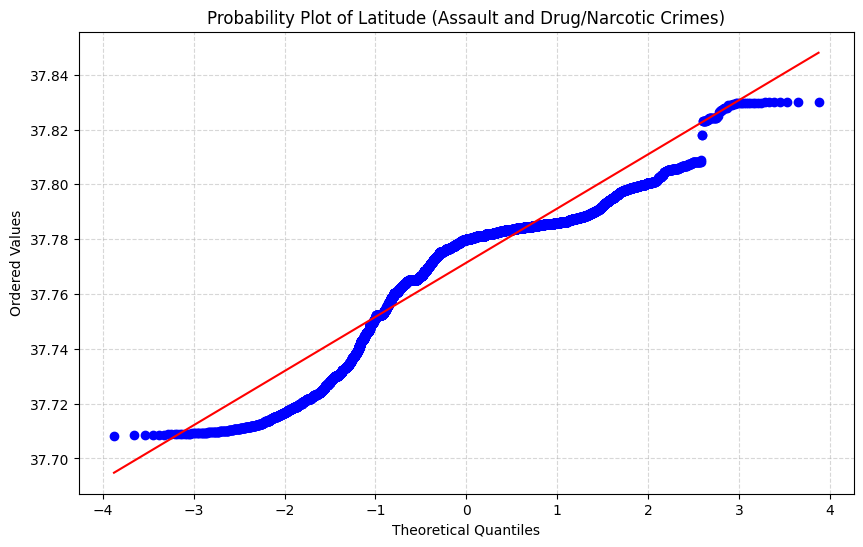

In [15]:
# Create the probability plot
plt.figure(figsize=(10, 6))
probplot(latitudes, plot=plt)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values")
plt.title("Probability Plot of Latitude (Assault and Drug/Narcotic Crimes)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()



The Q-Q plot of latitude values for Assault and Drug/Narcotic crimes reveals a clear deviation from normality. While a perfectly normal distribution would align closely with the red reference line, the data points show noticeable curvature, especially at the tails. The clustering at the upper end suggests a concentration of crime locations rather than a uniform spread across latitude. These deviations imply that assuming normality in statistical analyses of this data may not be appropriate.

> * OK, we're almost done, but we need some box plots. Here, I'd like you to use the box plots to visualize fluctuations of how many crimes happen per day. We'll use data from the 15 focus crimes defined last week.
>   * For the full time-span of the data, calulate the **number of crimes per day** within each category for the entire duration of the data.
>   * Create a box-and whiskers plot showing the mean, median, quantiles, etc for all 15 crime-types side-by-side. There are many ways to do this. I like to use [matplotlibs's built in functionality](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html), but you can also achieve good results with [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html) or [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html). <font color="gray">It's also fine to get help from your LLM, but make sure you check that the plot accurately shows the stats about the underlying data!</font>.
>   * What does this plot reveal that you can't see in the plots from last time?

The goal of this exercise is to do a box-plot displaying the number of crimes per day within each category. To do so, we will first group the data based on the category and the date.

In [16]:
daily_crime_count = data_focus.groupby(['Incident Category', 'Incident Date']).size().reset_index(name='Count')
daily_crime_count.head()

,Incident Category,Incident Date,Count
0,ASSAULT,2003-01-01,80
1,ASSAULT,2003-01-02,27
2,ASSAULT,2003-01-03,30
3,ASSAULT,2003-01-04,29
4,ASSAULT,2003-01-05,38


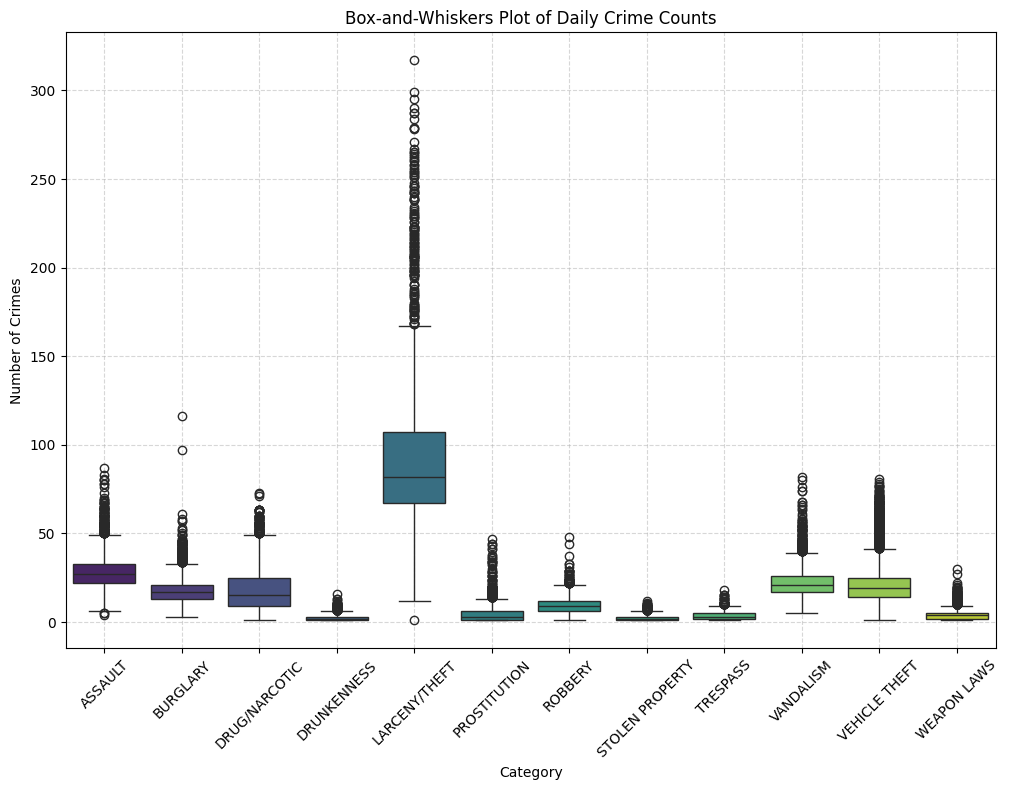

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Incident Category', y='Count', data=daily_crime_count, palette='viridis')
plt.xlabel("Category")
plt.ylabel("Number of Crimes")
plt.title("Box-and-Whiskers Plot of Daily Crime Counts")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

The box-and-whiskers plot shows how daily crime counts vary across different categories. Larceny/Theft is the most common crime, with a high median and large variations, sometimes exceeding 300 incidents per day. Assault, Burglary, Drug/Narcotic offenses, Vandalism, and Vehicle Theft also occur frequently and show spikes on certain days. On the other hand, Drunkenness, Prostitution, Robbery, Stolen Property, Trespassing, and Weapon Law violations happen less often and are more consistent. 

The many outliers suggest that crime rates fluctuate, with some days seeing much higher numbers than usual.

> * Also I want to show you guys another interesting use of box plots. To get started, let's calculate another average for each focus-crime, namely what time of day the crime happens. So this time, the distribution we want to plot is the average time-of-day that a crime takes place. There are many ways to do this, but let me describe one way to do it. 
>   * For datapoint, the only thing you care about is the time-of-day, so discard everything else.
>   * You also have to deal with the fact that time is annoyingly not divided into nice units that go to 100 like many other numbers. I can think of two ways to deal with this.
>     * For each time-of-day, simply encode it as seconds since midnight.
>     * Or keep each whole hour, and convert the minute/second count to a percentage of an hour. So 10:15 $\rightarrow$ 10.25, 8:40 $\rightarrow$ 8.67, etc.
> * Now you can create box-plots to create an overview of *when various crimes occur*. Note that these plot have quite a different interpretation than ones we created in the previous exercise. Cool, right?

We know have to display the time of the day when the crimes happen. To do so, we will first encode the time of day as the seconds elapsed since midnight. After that, we will show the resulting box-plot.

In [18]:
# Function to convert time to seconds since midnight
def time_to_seconds(t):
    return t.hour * 3600 + t.minute * 60 + t.second

# Convert the 'Incident Time' column to datetime
data_focus['Incident Time'] = pd.to_datetime(data_focus['Incident Time'])

# Apply the function
data_focus['Time in Seconds'] = data_focus['Incident Time'].apply(time_to_seconds)

data_focus.head()

,Incident Number,Incident Code,Incident Category,Incident Description,Incident Day of Week,Incident Date,Incident Time,Police District,Resolution,Address,...,Point,Neighborhoods,Current Police Districts,Current Supervisor Districts,Incident Month,Incident Month Name,Incident Year,Incident Hour,Incident Minute,Time in Seconds
1,101081080,4134,ASSAULT,BATTERY,Sunday,2010-11-21,2025-03-02 17:00:00,SOUTHERN,NONE,400 Block of 10TH ST,...,POINT (-122.410541166987 37.7709130566165),32.0,1.0,10.0,11,November,2010,17,0,61200
2,130270698,4134,ASSAULT,BATTERY,Tuesday,2013-04-02,2025-03-02 15:50:00,TARAVAL,NONE,14TH AV / SANTIAGO ST,...,POINT (-122.470365997562 37.74515794927),44.0,10.0,8.0,4,April,2013,15,50,57000
3,170639913,4134,ASSAULT,BATTERY,Sunday,2017-08-06,2025-03-02 18:15:00,SOUTHERN,NONE,800 Block of BRYANT ST,...,POINT (-122.40340479147905 37.775420706711),32.0,1.0,10.0,8,August,2017,18,15,65700
4,90988438,5041,BURGLARY,"BURGLARY OF RESIDENCE, FORCIBLE ENTRY",Thursday,2009-09-24,2025-03-02 13:30:00,BAYVIEW,NONE,1500 Block of SHAFTER AV,...,POINT (-122.38984911479702 37.7304741509374),86.0,2.0,9.0,9,September,2009,13,30,48600
5,126202675,6244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,2012-12-21,2025-03-02 19:15:00,CENTRAL,NONE,PACIFIC AV / GRANT AV,...,POINT (-122.40683198642701 37.7969028838908),104.0,6.0,3.0,12,December,2012,19,15,69300


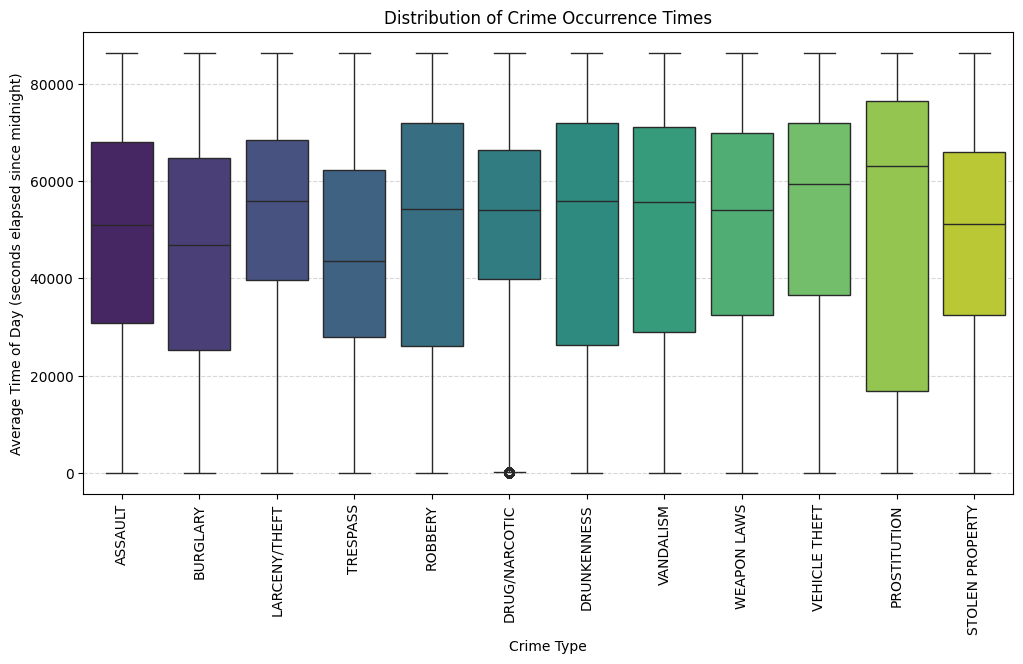

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Incident Category', y='Time in Seconds', data=data_focus, palette='viridis')

plt.xlabel("Crime Type")
plt.ylabel("Average Time of Day (seconds elapsed since midnight)")
plt.title("Distribution of Crime Occurrence Times")
plt.xticks(rotation=90)  # Rotate labels for readability
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.show()

This box plot shows the distribution of crime occurrence times across different crime types, measured in seconds since midnight (where 0 represents midnight and 86,400 represents the end of the day). 

The data reveals distinct time patterns for certain crime. Prostitution tends to happen later at night, while Burglary and Larceny/Theft Trespassing occur earlier, likely during the day or evening. Drunkenness and Vandalism are more common in the evening and nighttime. Most crimes are spread throughout the day, but Drug/Narcotic offenses show an unusual outlier close to midnight, suggesting specific time concentrations. 

## Part 5

Finally, I'd like you to work on the exercise "*Exercise*: Using all the tools to understand the temporal trends of prostitution in SF over time" in Week 4, Part 3. 

First we will create the map of San Francisco based on the coordinates of the aproximate city center.


In [20]:
sf_lat, sf_lon = 37.7749, -122.4194
sf_map = folium.Map(location=[sf_lat, sf_lon], zoom_start=13)
sf_map

##### Putting everything you've learned to work

Now you've learned about lots of time-series analysis tricks and visualization. That means it's time for you to think for yourself with a slightly more independent exercise.

> *Exercise*: Using all the tools to understand the temporal trends of prostitution in SF over time.
> * It's quite simple really, *I'd like you to present your own analysis of what happens to the `PROSTITUTION`
> crime type in SF over time.*
>   - Hint: So think about trends over time, does every district show the same behavior?, or the same beahavior over time?, are there hotspots?, etc. A fancy way of saying this is: think about quantifying and explaining spatio-temporal patterns.
> * As an extra little thing, I also want you to reflect on the *role of data errors* in an analysis. Data errors could be things like imprecise GPS points, or imprecise recording of time.



First, we will analyze the temporal trends both annually and monthly. This will help us answer questions such as how prostitution has evolved over time and identify peaks and drops. The histogram and the heatmap displaying the months will allow us to observe how it changes throughout the months, revealing a certain seasonality.

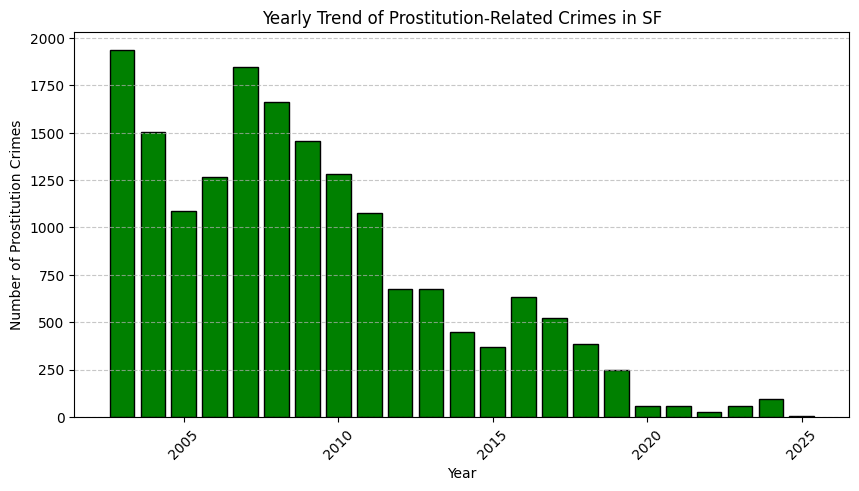

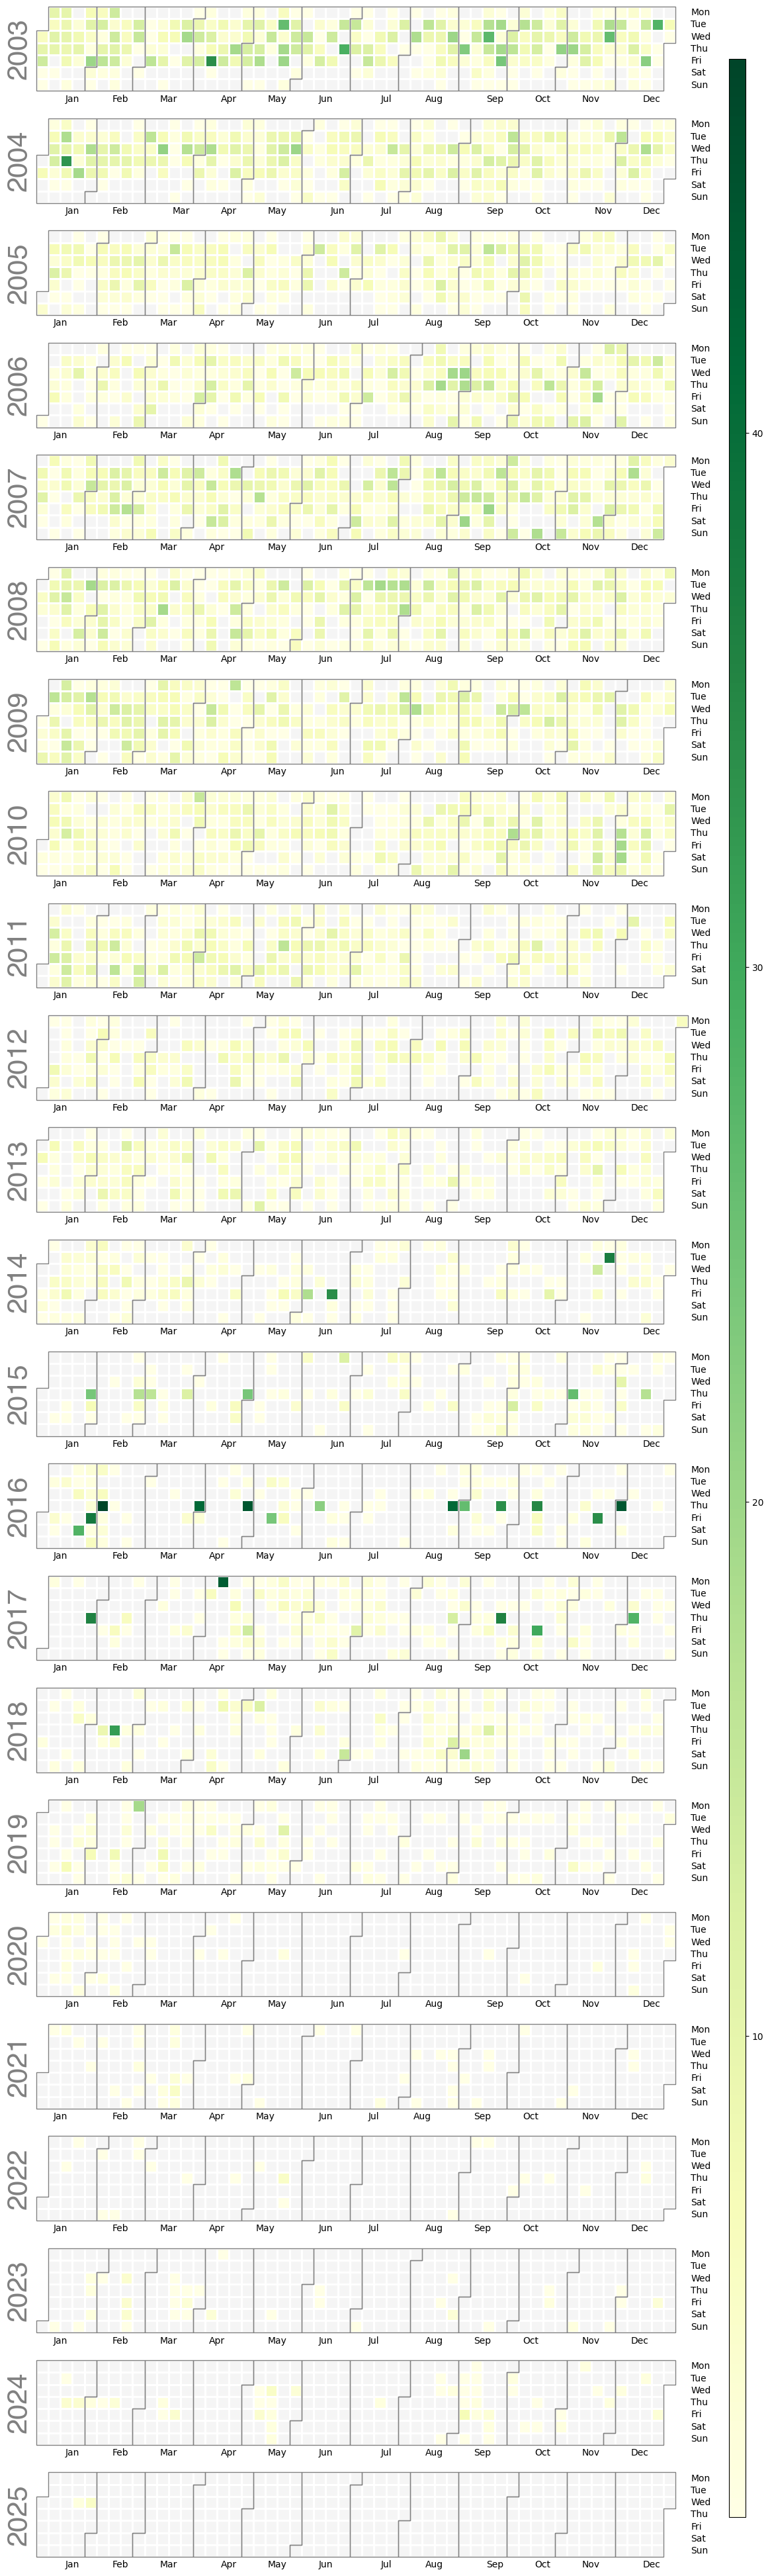

In [21]:
df_prostitution = data_focus[data_focus["Incident Category"].str.contains("PROSTITUTION", case=False, na=False)]

yearly_trend = df_prostitution.groupby("Incident Year").size()


# Plot yearly trend
plt.figure(figsize=(10, 5))
plt.bar(yearly_trend.index, yearly_trend.values, color="green", edgecolor="black")
plt.xlabel("Year")
plt.ylabel("Number of Prostitution Crimes")
plt.title("Yearly Trend of Prostitution-Related Crimes in SF")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Plot monthly trend
prostitution_data = data_focus[data_focus["Incident Category"] == "PROSTITUTION"]
prostitution_data['Incident Date'] = pd.to_datetime(prostitution_data['Incident Date'])

daily_counts = prostitution_data.groupby('Incident Date').size()

fig, ax = calplot.calplot(daily_counts, cmap='YlGn', colorbar=True)
plt.show()


What is observed in the histogram is that prostitution-related crimes have significantly decreased from the past to the present. The peak years are from 2003 to 2010, with two peaks in 2003 and 2008-2009. After that, a decline began, indicating possible policy changes or social factors. By 2015-2020, the number of cases becomes relatively low. From 2020 onward, the number of reported prostitution crimes is almost negligible. Although cases occur throughout the year, there is no clear seasonal pattern where a specific month consistently records the highest number of crimes. However, there appears to be a slight increase in activity during certain periods, particularly in the spring and summer months (March to July).  We can also study the trends during the week:

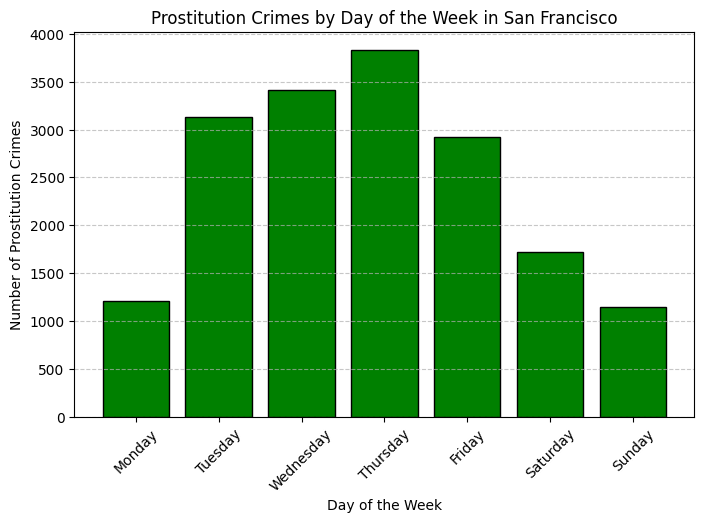

In [22]:
df_prostitution = data_focus[data_focus["Incident Category"].str.contains("PROSTITUTION", case=False, na=False)]
df_prostitution["Incident Date"] = pd.to_datetime(df_prostitution["Incident Date"])
df_prostitution["day_of_week"] = df_prostitution["Incident Date"].dt.day_name()

# Aggregate counts per day of the week
day_of_week_counts = df_prostitution["day_of_week"].value_counts()

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_of_week_counts = day_of_week_counts.reindex(day_order)

plt.figure(figsize=(8, 5))
plt.bar(day_of_week_counts.index, day_of_week_counts.values, color="green", edgecolor="black")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Prostitution Crimes")
plt.title("Prostitution Crimes by Day of the Week in San Francisco")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Weekly Trends:
Midweek, specifically Tuesday to Thursday, appears to be the most active period for prostitution-related incidents. However, there is a noticeable decline in cases as the weekend approaches, with Friday still showing relatively high numbers but a significant drop on Saturday and Sunday. This pattern suggests that prostitution activity may not be as strongly linked to weekend nightlife as one might expect.

Daily Trends: (from the polar chart in part 2)
From our hourly distribution analysis, the highest concentration of prostitution-related crimes occurs between 10 PM and 2 AM. This aligns with expectations, as prostitution is often associated with nightlife hours. After 2 AM, there is a sharp decline, with minimal activity between 3 AM and 11 AM.
Activity does not remain low throughout the day. Instead, prostitution-related crimes begin to rise again after 5 PM, building up steadily toward the late-night peak. This suggests a daily cycle, where activity ramps up in the evening, peaks around midnight, and drops sharply in the early morning hours.


Next, we will examine whether any district has a higher number of reports and use police districts to analyze this further.

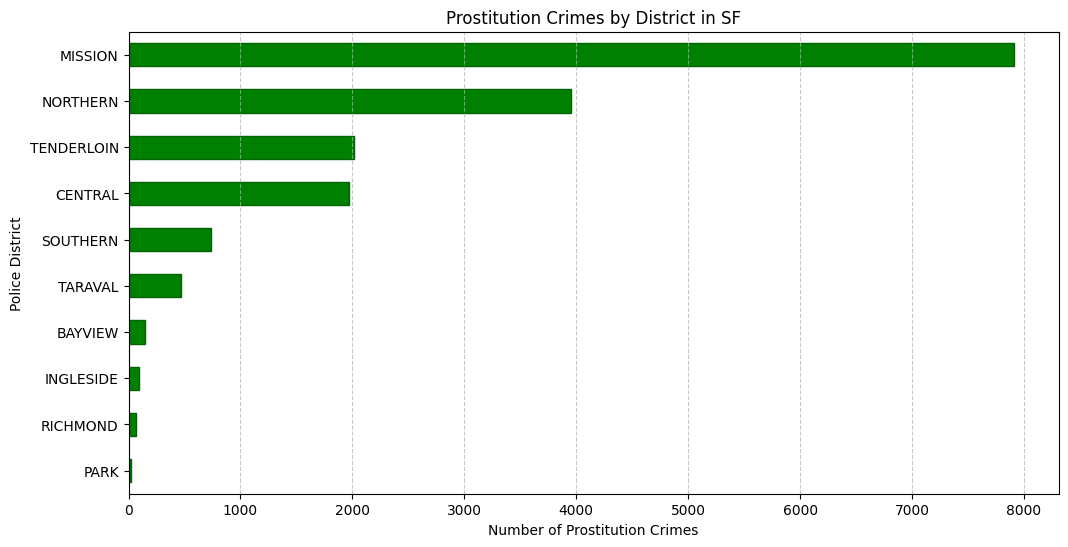

In [23]:
from folium.plugins import HeatMap  # Ensure this import is present
filtered_data = data_focus[data_focus["Incident Category"].str.contains("PROSTITUTION", case=False, na=False)]
filtered_data = filtered_data.dropna(subset=["Police District", "Latitude", "Longitude"])
district_counts = filtered_data["Police District"].value_counts()

# Plot district-wise comparison
plt.figure(figsize=(12, 6))
district_counts.sort_values(ascending=True).plot(kind="barh", color="green", edgecolor="darkgreen")
plt.xlabel("Number of Prostitution Crimes")
plt.ylabel("Police District")
plt.title("Prostitution Crimes by District in SF")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show bar chart
plt.show()

heatmap_data = filtered_data[["Latitude", "Longitude"]].values.tolist()

HeatMap(
    heatmap_data,
    radius=10,
    blur=10,
    max_zoom=12,
).add_to(sf_map)

sf_map


With the district plot, we can identify which areas are more prone to higher prostitution rates, and with the map, we can locate them spatially. To understand how prostitution-related crimes have evolved over time, I first created an annual heat map with time plot. This allows us to observe long-term trends and identify patterns.

In [24]:
from folium.plugins import HeatMapWithTime
filtered_data = data_focus[data_focus["Incident Category"].str.contains("PROSTITUTION", case=False, na=False)]
filtered_data = filtered_data.dropna(subset=["Latitude", "Longitude"])

heatmap_data = []
years = sorted(filtered_data["Incident Year"].unique())  # Sorted list of unique years

for year in years:
    year_data = filtered_data[filtered_data["Incident Year"] == year]
    heatmap_data.append(year_data[["Latitude", "Longitude"]].values.tolist())

# Create the base map centered on San Francisco
sf_lat, sf_lon = 37.7749, -122.4194
sf_map = folium.Map(location=[sf_lat, sf_lon], zoom_start=13)

HeatMapWithTime(
    heatmap_data,
    index=[str(year) for year in years],  # Use years as the time index
    radius=12,  # Controls spread of points
    gradient={0.2: "blue", 0.4: "green", 0.6: "yellow", 0.8: "orange", 1: "red"},
).add_to(sf_map)

sf_map

By analyzing this annually, we can observe how the prostitution rate has been decreasing over the years and how the hotspots in different neighborhoods have also become smaller.

From the annual trend plot, we can clearly see that prostitution-related crimes peaked in a particular year. By plotting two heatmaps, one for 2003 (peak year) and another for 2022 (lowest year), we can analyze whether prostitution-related crimes have shifted geographically over 20 years.

In [25]:
from folium.plugins import HeatMapWithTime
data_focus["Incident Date"] = pd.to_datetime(data_focus["Incident Date"])

filtered_data = data_focus[
    (data_focus["Incident Category"] == "PROSTITUTION") & 
    (data_focus["Incident Date"].dt.year == 2003)
]
filtered_data = filtered_data.dropna(subset=["Latitude", "Longitude"])

filtered_data["Month"] = filtered_data["Incident Date"].dt.month
heatmap_data = []
days = sorted(filtered_data["Month"].unique())  # Sorted list of unique days

for day in days:
    day_data = filtered_data[filtered_data["Month"] == day]
    heatmap_data.append(day_data[["Latitude", "Longitude"]].values.tolist())

# Create the base map centered on San Francisco
sf_lat, sf_lon = 37.7749, -122.4194
sf_map = folium.Map(location=[sf_lat, sf_lon], zoom_start=13)

# Add time-based heatmap layer
HeatMapWithTime(
    heatmap_data,
    index=[str(day) for day in days],  # Use day numbers as time index
    radius=10,
    gradient={0.2: "blue", 0.4: "green", 0.6: "yellow", 0.8: "orange", 1: "red"},
).add_to(sf_map)

# Display the animated heatmap for 2003
sf_map


In [26]:
from folium.plugins import HeatMapWithTime

filtered_data = data_focus[
    (data_focus["Incident Category"] == "PROSTITUTION") & 
    (data_focus["Incident Date"].dt.year == 2022)
]

filtered_data = filtered_data.dropna(subset=["Latitude", "Longitude"])

# Create a new column for daily bins
filtered_data["Month"] = filtered_data["Incident Date"].dt.month

# Group data by day and store heatmap locations per day
heatmap_data = []
months = sorted(filtered_data["Month"].unique())  # Sorted list of unique days

for month in months:
    month_data = filtered_data[filtered_data["Month"] == month]
    heatmap_data.append(month_data[["Latitude", "Longitude"]].values.tolist())

# Create the base map centered on San Francisco
sf_lat, sf_lon = 37.7749, -122.4194
sf_map = folium.Map(location=[sf_lat, sf_lon], zoom_start=13)

# Add time-based heatmap layer
HeatMapWithTime(
    heatmap_data,
    index=[str(month) for month in months],  # Use day numbers as time index
    radius=10,
    gradient={0.2: "blue", 0.4: "green", 0.6: "yellow", 0.8: "orange", 1: "red"},
).add_to(sf_map)

# Display the animated heatmap for 2003
sf_map

After analyzing these two map plots, first for 2003 and then for 2022, we can clearly see that activity has decreased significantly. However, the neighborhoods remain almost the same, especially in **Mission District**, while there is a much greater decline in the **Northern District**.